# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [71]:
!pip install pmdarima

In [72]:
# импорт библиотек pandas и numpy
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())


# для игнорирования предупреждений
import warnings
warnings.filterwarnings("ignore")

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


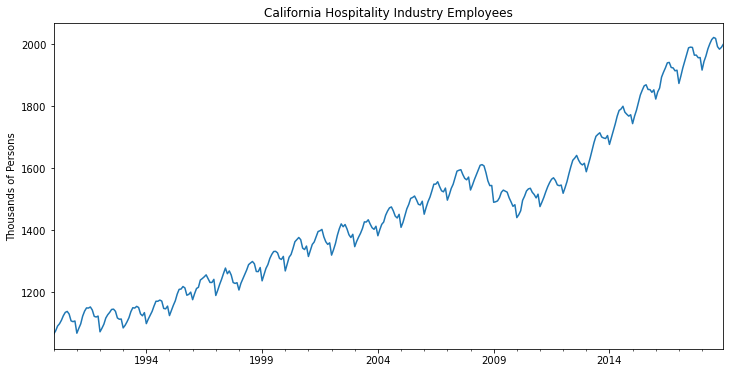

In [73]:
ax = df['Employees'].plot(title = 'California Hospitality Industry Employees', xlabel = '', ylabel = 'Thousands of Persons',\
                          figsize=(12,6))
ax.autoscale(axis='x',tight=True)

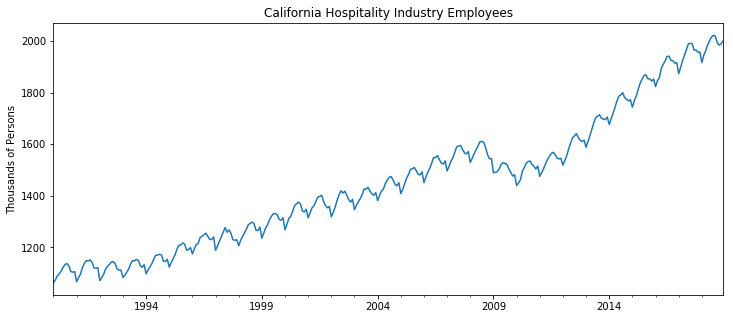

In [2]:
# ожидаемый результат

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').

In [74]:
r = seasonal_decompose(df['Employees'],model='additive')

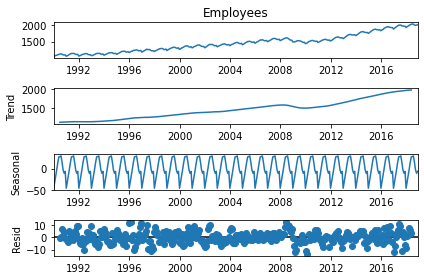

In [75]:
r.plot();

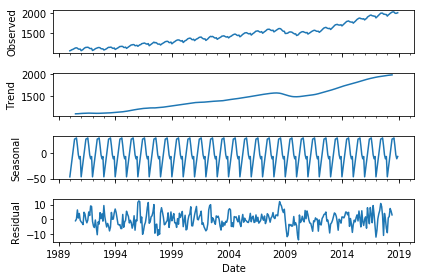

In [3]:
# ожидаемый результат

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [76]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 16 Dec 2021   AIC                           2208.504
Time:                                      13:47:23   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.530      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.474      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.150      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    705.126      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.324      0.000      -0.834      -0.664
sigma2        29.2970      1.717     17.064      0.000      25.932      32.662
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

После применения получили оптимальные параметры модели SARIMA(1, 1, 2)x(1, 0, [1], 12). Расхождение с ожидаемым результатом, обозначенным в задании, предположительно объясняются тем, что на входе брался несколько иной датасет.

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
### 4. Разделите данные на train/test 
Установите один год (12 записей) для тестирования. Есть несколько способов сделать это!

In [77]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train

In [82]:
# Обучим модель на оптимальных параметрах, полученных в п. 3: (1, 1, 2)x(1, 0, [1], 12).

model_optimal = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results_optimal = model_optimal.fit()
results_optimal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Thu, 16 Dec 2021   AIC                           2128.116
Time:                                      13:51:30   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.239      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.674      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.470      0.014       0.031       0.269
ar.S.L12       0.9973      0.001    729.172      0.000       0.995       1.000
ma.S.L12      -0.7518      0.044    -17.157      0.000      -0.838      -0.666
sigma2        28.7632      1.684     17.079      0.000      25.462      32.064
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Ожидаемый результат на параметрах (1, 1, 2)x(1, 0, [1], 12)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 07 Mar 2021   AIC                           2128.116
Time:                                      09:40:10   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.235      0.000       0.839       1.009
ma.L1         -0.9583      0.070    -13.634      0.000      -1.096      -0.821
ma.L2          0.1497      0.061      2.456      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.206      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.166      0.000      -0.838      -0.666
sigma2        28.7622      1.684     17.079      0.000      25.462      32.063
===================================================================================
Ljung-Box (Q):                       29.90   Jarque-Bera (JB):                73.33
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
# Обучим модель на параметрах, указанных в задании: (0,1,0)(2,0,0,12)

model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Thu, 16 Dec 2021   AIC                           2196.814
Time:                                    13:52:10   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# Ожидаемый результат на параметрах (0,1,0)(2,0,0,12)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Внимание! Дальнейшие вычисления будут производиться не для оптимальной модели (1, 1, 2)x(1, 0, [1], 12), а для модели с параметрами (0,1,0)(2,0,0,12), указанной в п. 5

### 6. Получите прогнозируемые значения

In [84]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions SARIMAX(0, 1, 0)x(2, 0, 0, 12)')

### 7. Нарисуйте графики прогнозируемых и известных значений


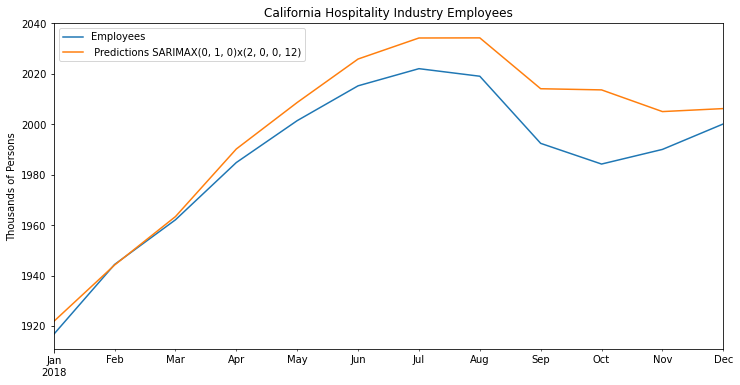

In [85]:
test['Employees'].plot(title = 'California Hospitality Industry Employees', xlabel = '', ylabel = 'Thousands of Persons', legend=True,  figsize=(12,6))
predictions.plot(legend=True);

### 8. Оцените качество модели с помощью MSE и RMSE


In [86]:
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMAX(0, 1, 0)x(2, 0, 0, 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(0, 1, 0)x(2, 0, 0, 12) RMSE Error: {error2:11.10}')

SARIMAX(0, 1, 0)x(2, 0, 0, 12) MSE Error: 182.8506741
SARIMAX(0, 1, 0)x(2, 0, 0, 12) RMSE Error: 13.52222889


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [87]:
model = SARIMAX(df['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.677
Date:                            Thu, 16 Dec 2021   AIC                           2275.353
Time:                                    13:54:13   BIC                           2286.901
Sample:                                01-01-1990   HQIC                          2279.951
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5293      0.040     13.352      0.000       0.452       0.607
ar.S.L24       0.4297      0.041     10.416      0.000       0.349       0.511
sigma2        37.3116      2.152     17.335      0.000      33.093      41.530
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                51.83
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(0, 1, 0)x(2 0, 0, 12) ')

### 10. Постройте график предсказаний и график исходных данных


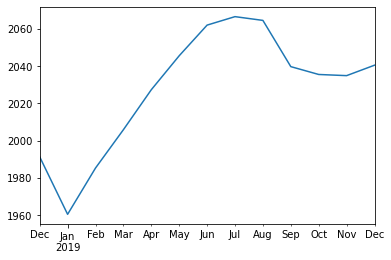

In [90]:
fcast.plot();
# df['Employees'][-1]

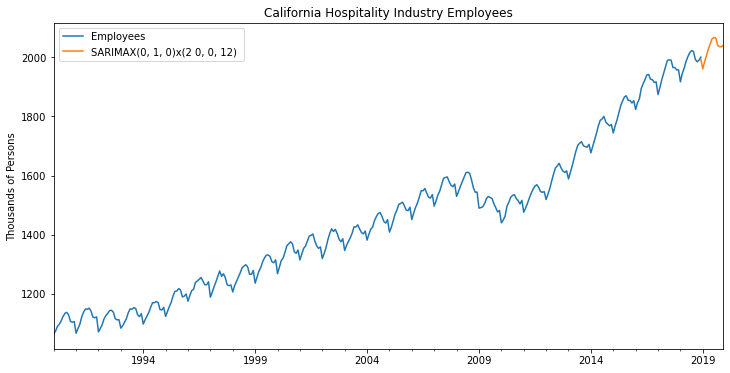

In [91]:
df['Employees'].plot(title = 'California Hospitality Industry Employees', xlabel = '', ylabel = 'Thousands of Persons', legend=True,  figsize=(12,6))
fcast.plot(legend=True);

### Вывод: На представленных графиках отчетливо видно, что тренд у количества сотрудников возрастающий и у нас есть четкая годовая сезонность. Построенная модель (0,1,0)(2,0,0,12) не является оптимальной, но достаточно неплохо прогнозирует будущие значения ряда на основании предыдущих значений.